In [47]:
#Programmer : Muhammad Khairul Rijal Bin Muhammad
#Matric No.: MAN 161021

In [48]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plt # graphics package
import seaborn as sns
from IPython.display import display, HTML

In [49]:
#Load Data From CSV
telco = pd.read_csv('C://Users/mkrijal/Desktop/ML_Assignment/Telco-Customer-Churn.csv')
telco.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
#Dataset rows and columns
telco.shape

(7043, 21)

In [51]:
#Attributes type
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [52]:
#Check missing value/null
tab_info=pd.DataFrame(telco.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(telco.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(telco.isnull().sum()/telco.shape[0]*100).T.rename(index={0:'null values (%)'}))
display(tab_info)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
column type,object,object,int64,object,object,int64,object,object,object,object,...,object,object,object,object,object,object,object,float64,object,object
null values (nb),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#Check duplicate instances
telco.duplicated().sum()

0

In [54]:
#Show the summarize dataset
telco.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [55]:
#Show churn class
telco['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [56]:
#Count no of customer churn and not
pd.value_counts(telco["Churn"])

No     5174
Yes    1869
Name: Churn, dtype: int64

In [57]:
#Correlation Function
'''method : {‘pearson’, ‘kendall’, ‘spearman’}
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation
'''
correlation = telco.corr(method='pearson')
print(correlation)

                SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.016567        0.220173
tenure               0.016567  1.000000        0.247900
MonthlyCharges       0.220173  0.247900        1.000000


In [58]:
#Correlation Function
'''method : {‘pearson’, ‘kendall’, ‘spearman’}
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation
'''
correlation = telco.corr(method='kendall')
print(correlation)

                SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.015315        0.180636
tenure               0.015315  1.000000        0.190565
MonthlyCharges       0.180636  0.190565        1.000000


In [59]:
#Correlation Function
'''method : {‘pearson’, ‘kendall’, ‘spearman’}
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation
'''
correlation = telco.corr(method='spearman')
print(correlation)

                SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.018556        0.221067
tenure               0.018556  1.000000        0.276417
MonthlyCharges       0.221067  0.276417        1.000000


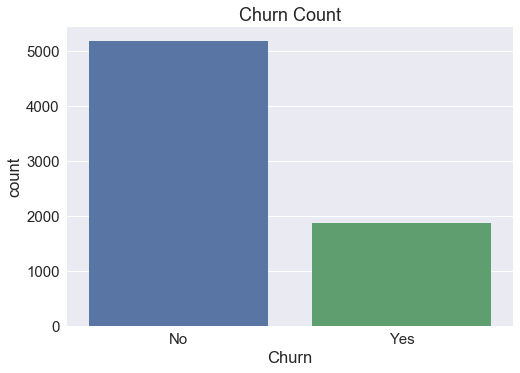

In [60]:
#Data Visualization
sns.set(font_scale=1.5)
sns.countplot(x="Churn", data=telco)
telco.loc[:,'Churn'].value_counts()
plt.title('Churn Count')
plt.savefig("Figure 1_Bar Graph.png") #save figure

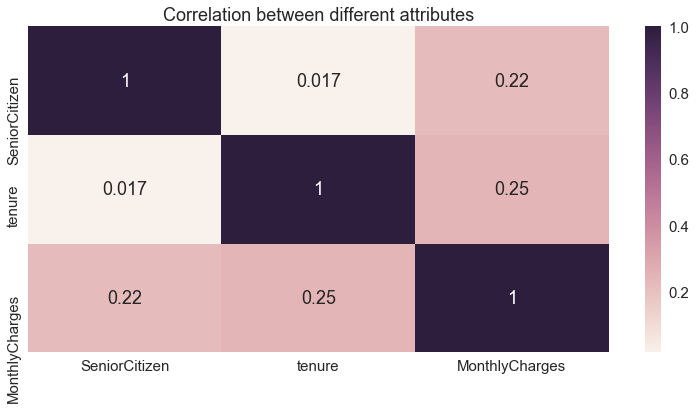

In [61]:
plt.figure(figsize=(13,6))
sns.heatmap(telco.corr(method='pearson'),annot=True)
plt.title('Correlation between different attributes')
plt.savefig("Figure 2_Correlation Attribute.png") #save figure

In [62]:
#Show gender class
telco['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [63]:
#Count no of male and female customer
pd.value_counts(telco["gender"])

Male      3555
Female    3488
Name: gender, dtype: int64

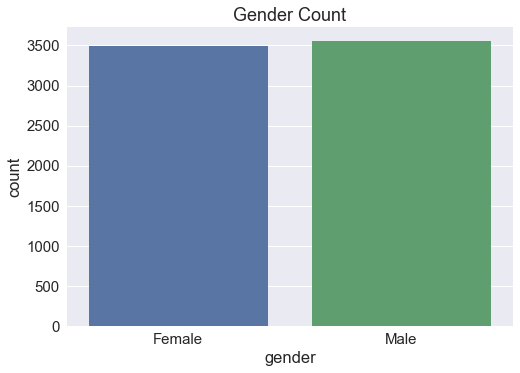

In [64]:
#Data Visualization
sns.set(font_scale=1.5)
sns.countplot(x="gender", data=telco)
telco.loc[:,'gender'].value_counts()
plt.title('Gender Count')
plt.savefig("Figure 1_Bar Graph.png") #save figure

In [65]:
Custstat = telco[['tenure','MonthlyCharges','Churn']]
Custstat.head()

,tenure,MonthlyCharges,Churn
0,1,29.85,No
1,34,56.95,No
2,2,53.85,Yes
3,45,42.30,No
4,2,70.70,Yes


In [66]:
#Show churn class
Custstat['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [67]:
#Count no of customer churn and not
pd.value_counts(Custstat["Churn"])

No     5174
Yes    1869
Name: Churn, dtype: int64

In [68]:
#Correlation Function
'''method : {‘pearson’, ‘kendall’, ‘spearman’}
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation
'''
correlation = Custstat.corr(method='pearson')
print(correlation)

                tenure  MonthlyCharges
tenure          1.0000          0.2479
MonthlyCharges  0.2479          1.0000


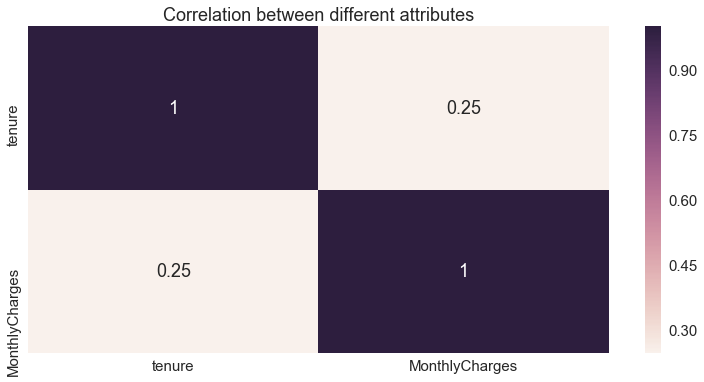

In [69]:
plt.figure(figsize=(13,6))
sns.heatmap(Custstat.corr(method='pearson'),annot=True)
plt.title('Correlation between different attributes')
plt.savefig("Figure 2_Correlation Attribute.png") #save figure

In [81]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = Custstat.loc[:,Custstat.columns != 'Churn'], Custstat.loc[:,'Churn']
knn.fit(x,y)
knnprediction = knn.predict(x)
print('Accuracy of KNN with (K=3) is: ',knn.score(x,y))

Accuracy of KNN with (K=3) is:  0.86312650859


In [82]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = Custstat.loc[:,Custstat.columns != 'Churn'], Custstat.loc[:,'Churn']
knn.fit(x_train,y_train)
knnprediction = knn.predict(x_test)
print('Accuracy of KNN with (K=3) for Training is: ',knn.score(x_train,y_train))
print('Accuracy of KNN with (K=3) for Testing is: ',knn.score(x_test,y_test))

Accuracy of KNN with (K=3) for Training is:  0.85415821501
Accuracy of KNN with (K=3) for Testing is:  0.768575485092


In [83]:
# Evaluate using Cross-Validation
from sklearn.model_selection import cross_val_score
print("KNN: ")
print(cross_val_score(knn, x, y, scoring='accuracy', cv = 10))
accuracy = cross_val_score(knn, x, y, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of KNN is: " , accuracy)

KNN: 
[ 0.72340426  0.74042553  0.76737589  0.76595745  0.75142045  0.74857955
  0.77982955  0.73721591  0.75        0.74395448]
Accuracy of KNN is:  75.0816305591


KNN:Confusion Matrix
[[1370  215]
 [ 274  254]]
Confusion matrix plot of KNN


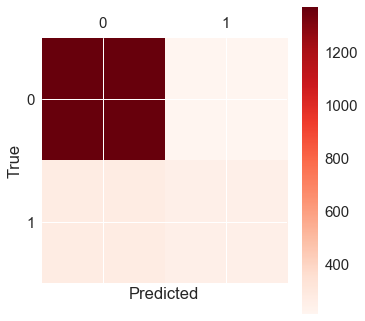

Classification Report
             precision    recall  f1-score   support

         No       0.83      0.86      0.85      1585
        Yes       0.54      0.48      0.51       528

avg / total       0.76      0.77      0.76      2113



In [84]:
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics
from sklearn.metrics import confusion_matrix
#KNN
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, knnprediction)
print('KNN:Confusion Matrix')
print(c_m)
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of KNN')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('Classification Report')
print(classification_report(y_test, knnprediction))

In [85]:
#Decision Tree
from sklearn.tree import export_graphviz
import graphviz

In [86]:
# Let's rerun the decision tree classifier
from sklearn import tree

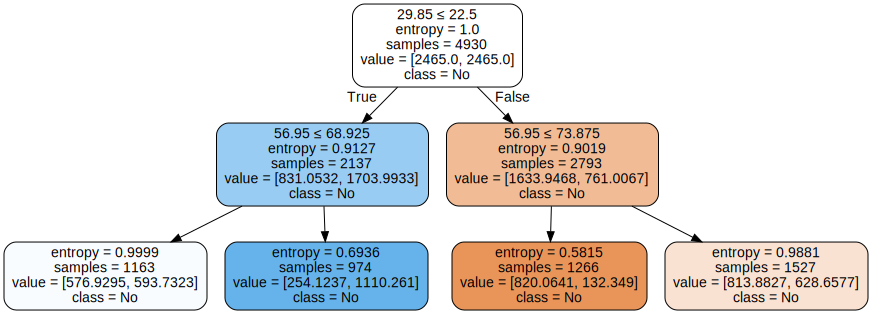

In [104]:
#X_train, X_test, y_train, y_test = train_test_split(telco.loc[:,Custstat.columns != 'Churn'], telco.loc[:,'Churn'], stratify=telco.Churn, random_state=2)
#tree = DecisionTreeClassifier(random_state=0)

#tree.fit(x_train, y_train)

t = tree.DecisionTreeClassifier(max_depth = 2,
                                    criterion = 'entropy', 
                                    class_weight = 'balanced',
                                    random_state = 1)
t.fit(x_train, y_train)

t.score(x_test, y_test) # what performance metric is this?

export_graphviz(t, out_file="mytree.dot",  
                         feature_names=Custstat.MonthlyCharges,  
                         class_names=Custstat.Churn,  
                         filled=True, rounded=True,  
                         special_characters=True)

with open("mytree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph, format = 'png')

In [89]:
#From Decision Tree to Random Forest
#data = Custstat[['tenure','MonthlyCharges']]
X, y = Custstat.loc[:,Custstat.columns != 'Churn'], Custstat.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [92]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=4,
                                criterion = 'entropy', 
                                n_estimators = 100, 
                                class_weight = 'balanced',
                                n_jobs = -1,
                               random_state = 2)

#forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_preds = Custstat.Churn[forest.predict(X_test)]

forest.score(X_test, y_test)

0.7179365830572646

In [93]:
# Here's a nifty way to cross-validate (useful for model evaluation!)
from sklearn import cross_validation

# reinitialize classifier
forest = RandomForestClassifier(max_depth=4,
                                criterion = 'entropy', 
                                n_estimators = 100, 
                                class_weight = 'balanced',
                                n_jobs = -1,
                               random_state = 2)

score = cross_validation.cross_val_score(forest, X, y)
score

C:\Users\mkrijal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([ 0.72572402,  0.73168654,  0.75031956])

In [100]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
forest = RandomForestClassifier(max_depth=4,
                                criterion = 'entropy', 
                                n_estimators = 10, 
                                class_weight = 'balanced',
                                n_jobs = -1,
                               random_state = 1)
x,y = Custstat.loc[:,Custstat.columns != 'Churn'], Custstat.loc[:,'Churn']
forest.fit(x_train,y_train)
forestprediction = knn.predict(x_test)
print('Accuracy of Random Forest for Training is: ',forest.score(x_train,y_train))
print('Accuracy of Random Forest for Testing is: ',forest.score(x_test,y_test))

Accuracy of Random Forest for Training is:  0.752738336714
Accuracy of Random Forest for Testing is:  0.747278750592


In [101]:
# Evaluate using Cross-Validation
from sklearn.model_selection import cross_val_score
print("Random Forest: ")
print(cross_val_score(forest, x, y, scoring='accuracy', cv = 10))
accuracy = cross_val_score(forest, x, y, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of forest is: " , accuracy)

Random Forest: 
[ 0.7106383   0.71205674  0.74326241  0.75744681  0.74147727  0.72443182
  0.73863636  0.74431818  0.73295455  0.76244666]
Accuracy of forest is:  73.6766909432


Random Forest:Confusion Matrix
[[1370  215]
 [ 274  254]]
Confusion matrix plot of Random Forest


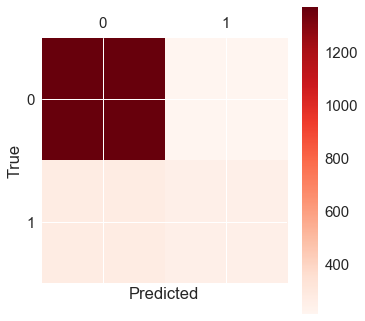

Classification Report
             precision    recall  f1-score   support

         No       0.83      0.86      0.85      1585
        Yes       0.54      0.48      0.51       528

avg / total       0.76      0.77      0.76      2113



In [103]:
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics
from sklearn.metrics import confusion_matrix
#Random Forest
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, forestprediction)
print('Random Forest:Confusion Matrix')
print(c_m)
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of Random Forest')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('Classification Report')
print(classification_report(y_test, forestprediction))